In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
from scipy.optimize import curve_fit
import importlib
from cycler import cycler
from matplotlib.ticker import MultipleLocator
#importlib.reload(utils)

In [60]:
# Import data

Xenon_file_path_1 = f'Data/Xe-1.txt'
Xenon_file_path_2 = f'Data/Xe-2.txt'
Xenon_file_path_3 = f'Data/Xe-3.txt'
Xenon_file_path_4 = f'Data/Xe-4.txt'  
Xenon_file_path_5 = f'Data/Xe-5.txt'
Xenon_file_path_6 = f'Data/Xe-6.txt'
Xenon_file_path_7 = f'Data/Xe-7.txt'
Xenon_file_path_8 = f'Data/Xe-8.txt'
Xenon_file_path_9 = f'Data/Xe-9.txt'

file_paths = [
    Xenon_file_path_1,
    Xenon_file_path_2,
    Xenon_file_path_3,
    Xenon_file_path_4,
    Xenon_file_path_5,
    Xenon_file_path_6,
    Xenon_file_path_7,
    Xenon_file_path_8,
    Xenon_file_path_9,
]

data_dict = {}
for file_path in file_paths:
    data = pd.read_csv(file_path, header=None, skiprows=22)
    data_dict[file_path] = data


In [61]:
max_value = 0
for key, data in data_dict.items():
    temp_max = data[1].max()
    if temp_max > max_value:
        max_value = temp_max

In [62]:
for key, data in data_dict.items():
    intensity = data[1] / max_value * 100  # Normalize to percentage
    data_dict[key]['Intensity'] = intensity


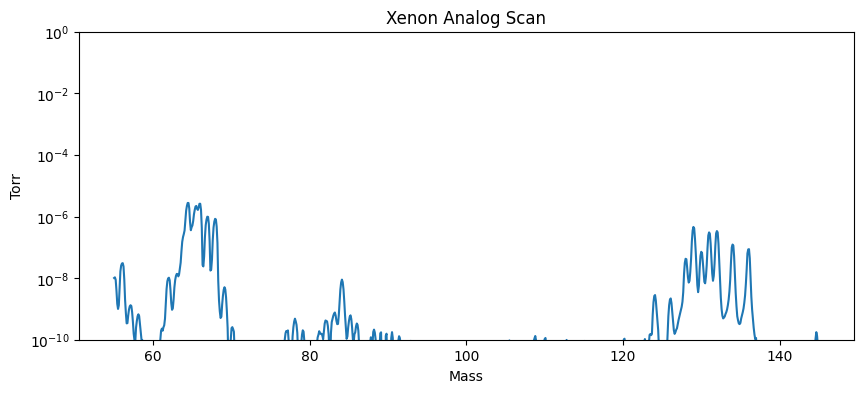

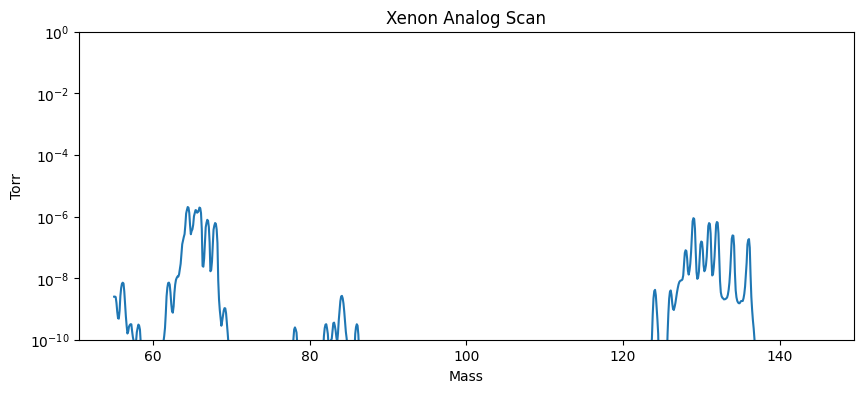

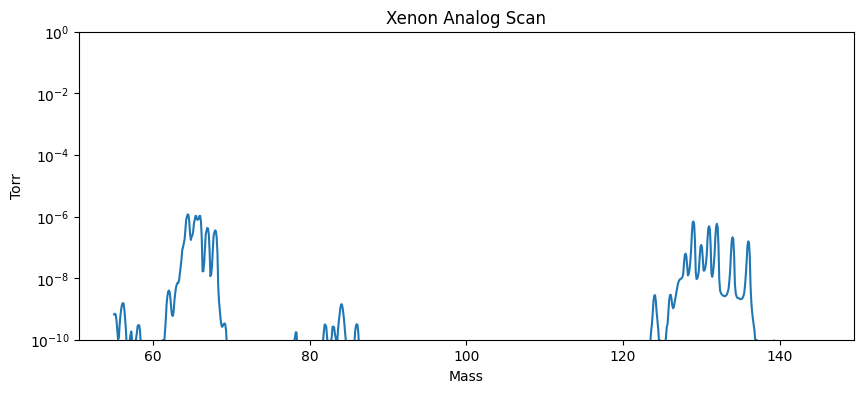

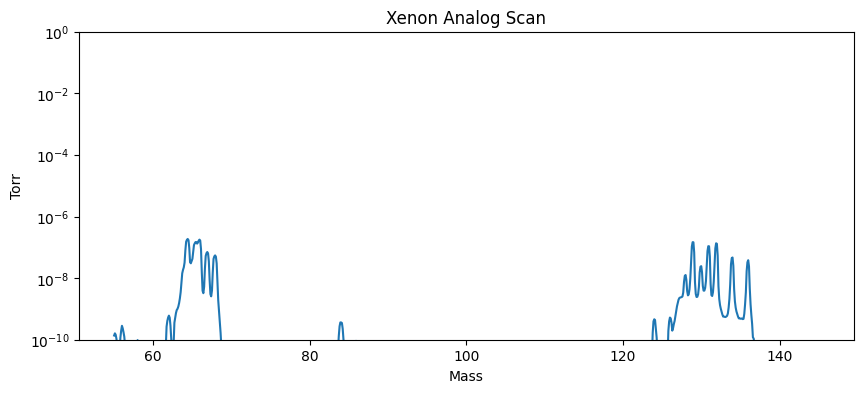

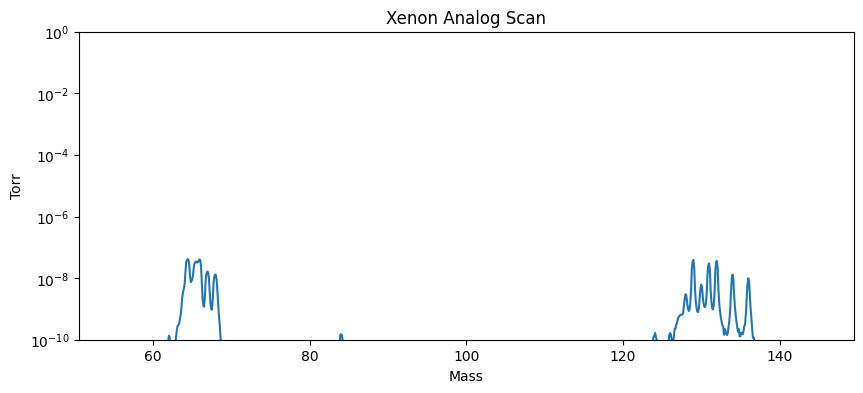

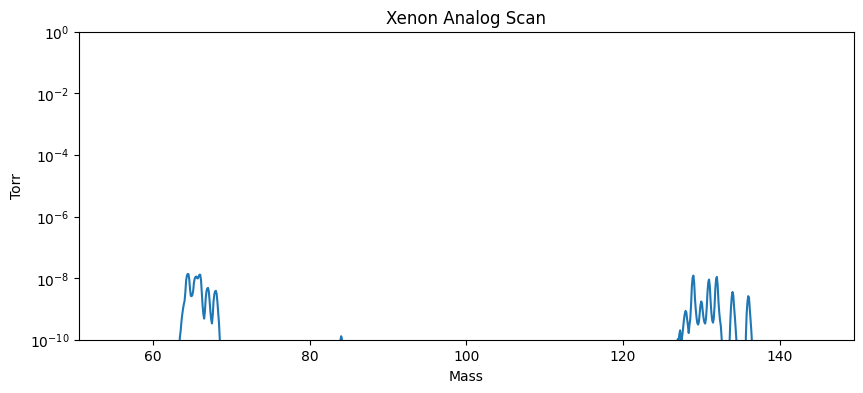

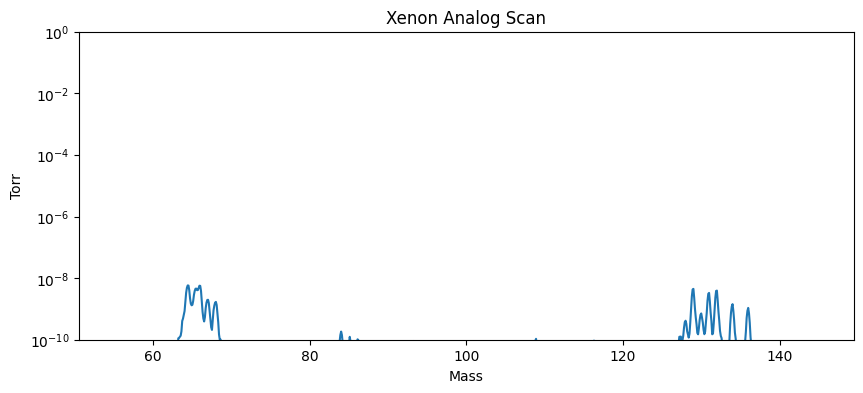

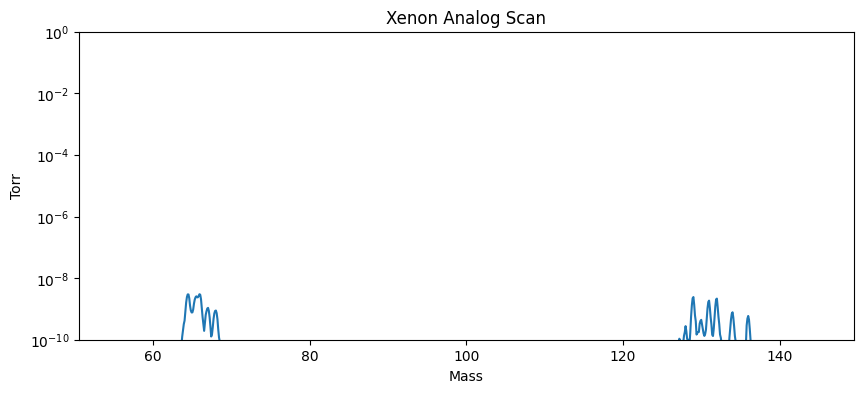

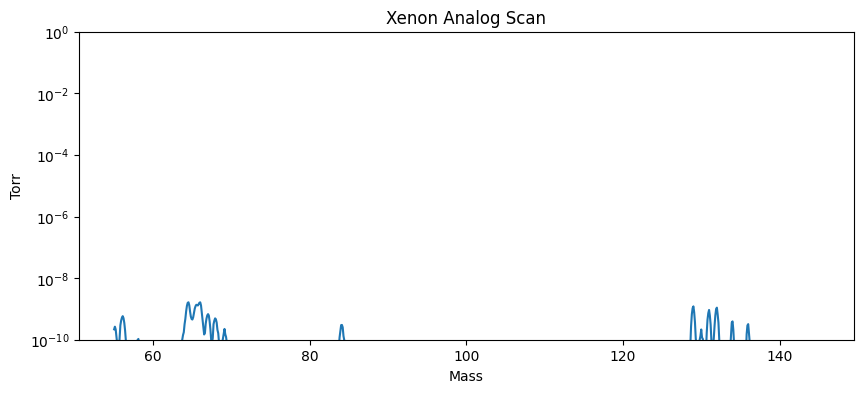

In [63]:
for key, data in data_dict.items():
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_ylim(bottom=1e-10)
    ax.set_yscale('log')
    ax.plot(data[0], data[1])
    ax.set(xlabel='Mass', ylabel='Torr', title='Xenon Analog Scan')
    plt.show()
    

In [64]:
tableau9 = [
     "#3B71AA", "#F28E2B", "#020101", "#2EBBAF", "#2C8021",
    "#EDC948", "#FF1FBF", "#F3152B", "#CA6023"
]
major_step = 10
minor_step = 5

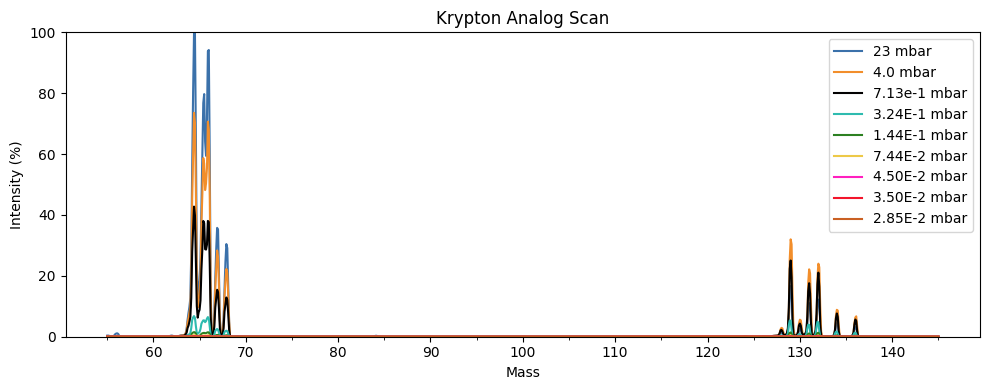

In [65]:
fig, ax = plt.subplots(figsize=(10, 4))
pressures = [
    '23 mbar', '4.0 mbar', '7.13e-1 mbar', '3.24E-1 mbar', '1.44E-1 mbar',
    '7.44E-2 mbar', '4.50E-2 mbar', '3.50E-2 mbar', '2.85E-2 mbar'
]
ax.set_prop_cycle(cycler(color=tableau9))
ax.set_ylim(0, 100)
ax.xaxis.set_major_locator(MultipleLocator(major_step))
ax.xaxis.set_minor_locator(MultipleLocator(minor_step))
for key, data in data_dict.items():
    ax.plot(data[0], data['Intensity'])
    ax.set(xlabel='Mass', ylabel='Intensity (%)', title='Krypton Analog Scan')
plt.tight_layout()
plt.legend(pressures, loc='upper right')
plt.show()

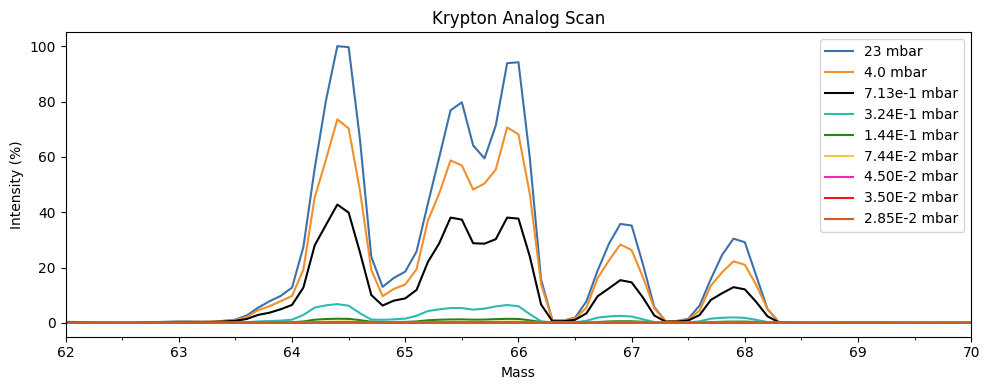

In [66]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.set_prop_cycle(cycler(color=tableau9))
ax.set_xlim(62, 70)
ax.xaxis.set_major_locator(MultipleLocator(minor_step/5))
ax.xaxis.set_minor_locator(MultipleLocator(minor_step/10))
for key, data in data_dict.items():
    ax.plot(data[0], data['Intensity'])
    ax.set(xlabel='Mass', ylabel='Intensity (%)', title='Krypton Analog Scan')
plt.tight_layout()
plt.legend(pressures, loc='upper right')
plt.show()

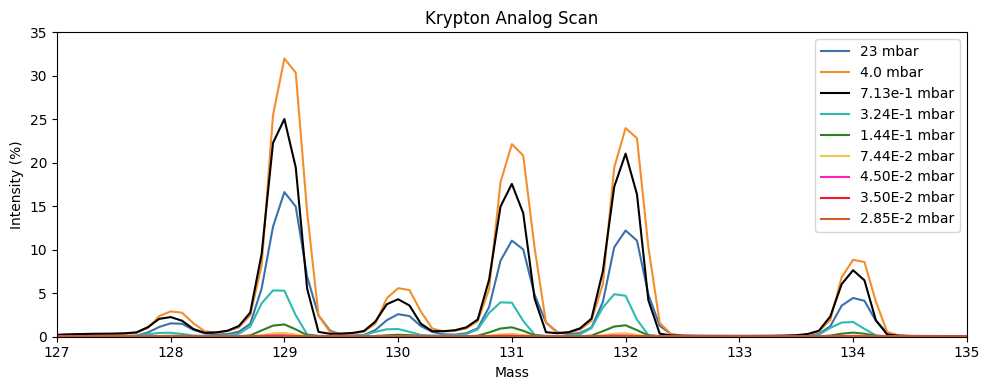

In [67]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_prop_cycle(cycler(color=tableau9))
ax.set_xlim(127, 135)
ax.set_ylim(0, 35)
ax.xaxis.set_major_locator(MultipleLocator(minor_step/5))
#ax.xaxis.set_minor_locator(MultipleLocator(minor_step/5))
for key, data in data_dict.items():
    ax.plot(data[0], data['Intensity'])
    ax.set(xlabel='Mass', ylabel='Intensity (%)', title='Krypton Analog Scan')
plt.tight_layout()
plt.legend(pressures, loc='upper right')
plt.show()

In [73]:
# Import data

krypton_file_path_1 = f'Data/Kr-1.txt'
krypton_file_path_2 = f'Data/Kr-2.txt'
krypton_file_path_3 = f'Data/Kr-3.txt'
krypton_file_path_4 = f'Data/Kr-4.txt'  
krypton_file_path_5 = f'Data/Kr-5.txt'
krypton_file_path_6 = f'Data/Kr-6.txt'
krypton_file_path_7 = f'Data/Kr-7.txt'
krypton_file_path_8 = f'Data/Kr-8.txt'
krypton_file_path_9 = f'Data/Kr-9.txt'
krypton_file_path_10 = f'Data/Kr-10.txt'

file_paths_kr = [
    krypton_file_path_1,
    krypton_file_path_2,
    krypton_file_path_3,
    krypton_file_path_4,
    krypton_file_path_5,
    krypton_file_path_6,
    krypton_file_path_7,
    krypton_file_path_8,
    krypton_file_path_9,
    krypton_file_path_10
]

data_dict_2 = {}
for file_path in file_paths_kr:
    data = pd.read_csv(file_path, header=None, skiprows=22)
    data_dict_2[file_path] = data

max_value = 0
for key, data in data_dict_2.items():
    temp_max = data[1].max()
    if temp_max > max_value:
        max_value = temp_max

for key, data in data_dict_2.items():
    intensity = data[1] / max_value * 100  # Normalize to percentage
    data_dict_2[key]['Intensity'] = intensity


In [81]:
pressures = [
    23, 4.0, 7.13e-1, 3.24e-1, 1.44e-1,
    7.44e-2, 4.50e-2, 3.50e-2, 2.85e-2
]

pressures2 = [
    25, 4.5, 1.24 , 1.18, 1.05, 
    4.45e-1 , 1.97e-1 , 1.53e-1, 7.90e-2 , 3.85e-2 
]

In [82]:
# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pressure_intensity = {                        # ←  a **set** of tuples
    (p, d['Intensity'].max())                 #    (pressure, max-I)
    for (p, (_, d)) in zip(pressures, data_dict.items())
}

In [83]:
pressure_intensity_2 = {                        # ←  a **set** of tuples
    (p, d['Intensity'].max())                 #    (pressure, max-I)
    for (p, (_, d)) in zip(pressures2, data_dict_2.items())
}

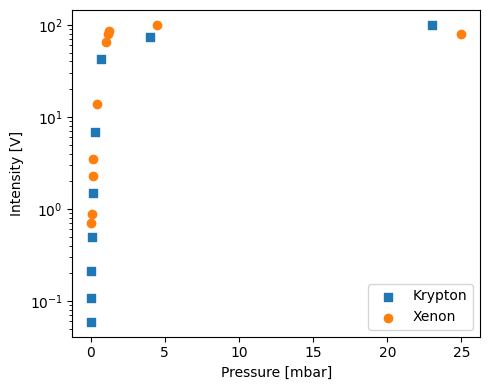

In [92]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.scatter(*zip(*pressure_intensity),   marker='s', label='Krypton')
ax.scatter(*zip(*pressure_intensity_2), marker='o', label='Xenon')

ax.set_yscale('log')
ax.set_xlabel('Pressure [mbar]')
ax.set_ylabel('Intensity [V]')
#ax.grid(True, which='both', ls='--', lw=0.5)
ax.legend()
plt.tight_layout()
plt.show()

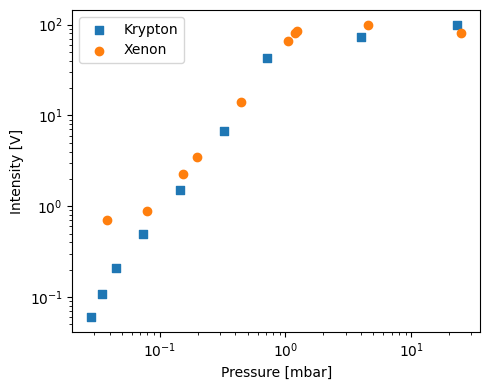

In [93]:
fig, ax = plt.subplots(figsize=(5, 4))

ax.scatter(*zip(*pressure_intensity),   marker='s', label='Krypton')
ax.scatter(*zip(*pressure_intensity_2), marker='o', label='Xenon')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Pressure [mbar]')
ax.set_ylabel('Intensity [V]')
#ax.grid(True, which='both', ls='--', lw=0.5)
ax.legend()
plt.tight_layout()
plt.show()